In [1]:
# references
# https://github.com/lechemrc/CS-Build-Week/blob/master/src/project.ipynb
# https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203

In [2]:
# 필요한 라이브러리 import
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

### Create Random Dataset

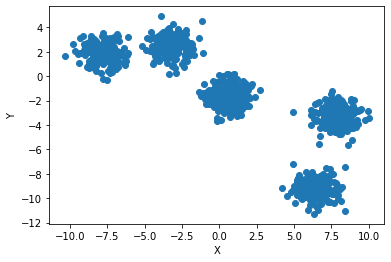

In [3]:
X, y = make_blobs(n_samples=1000, centers=5, cluster_std=0.80, random_state=6) # n_samples: 생성할 데이터 총 개수, centers: 생성할 군집의 수
plt.scatter(X[:,0], X[:,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### K-means Algorithm with scikit-learn library

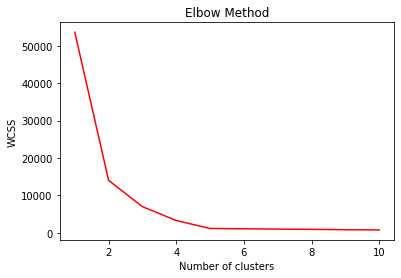

WCSS: [53585.070959676006, 14022.014844064228, 7006.516867507868, 3300.4919178872383, 1182.682170829657, 1092.3286427957535, 1013.0703151768425, 939.3608552674409, 846.2398567053247, 792.7741447808739]


In [4]:
# Elbow method: k 값을 변화하며 K-means를 여러 번 수행 후 inertia 값 관찰하기
wcss = []
for i in range(1, 11): # k 값을 1부터 10까지 변화하며 elbow plot 그리기
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, 'r')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
print("WCSS:", wcss)

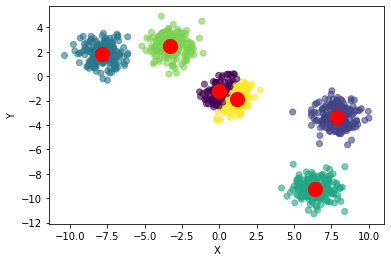

1092.3286427957535


In [5]:
# 정해진 k값에 대해 K-means 수행 후 결과 그림 그려보기
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0) # n_clusters: 위의 elbow plot에서 찾은 적절한 k값 입력
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
print(kmeans.inertia_)